In [ ]:
# Import required  libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
import datetime
import time
import math
import warnings
warnings.filterwarnings("ignore")
import glob
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [ ]:
#Generate 2d data randomly with 3 clusters

number_of_point = 100000
dataset = make_blobs(n_samples = number_of_point, 
                    centers = 3, 
                    n_features= 2 , 
                    cluster_std=2,
                     shuffle=True,
                    random_state=10)
dataset

(array([[ 2.33938775,  4.59328822],
        [ 5.32800362,  2.15221811],
        [ 1.12134311, -4.60214415],
        ...,
        [-1.51547958, -2.41901463],
        [-1.77279744, -3.81156757],
        [ 8.62703174, -9.16161971]]), array([1, 1, 2, ..., 2, 2, 0]))

   ###  In the block above, we generated 100,000 points with 3 clusters, 2features(x,y) with class (dxy) which represent the cluster to  which the data point belong. We have shuffled the data so that they are random.

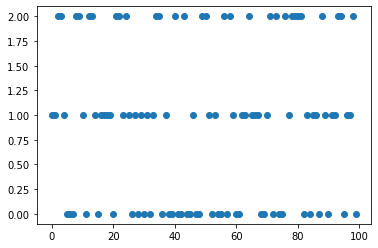

In [ ]:
plt.plot(dataset[1][0:100],'o')

### In the block above, we try to visualize the three classes to see how data points are distributed among the three classes and we see that they are balanced. In the following block, we then try to see the distribution ratio for each class.

In [ ]:
group1=0
group2=0
group3=0

for i in range(len(dataset[1])):
    if(dataset[1][i]==0):
        group1=group1+1
    elif(dataset[1][i]==1):
        group2=group2+1
    elif(dataset[1][i]==2):
        group3=group3+1
print("Ratio 1st group is", group1/len(dataset[1]))
print("Ratio 2nd group is", group2/len(dataset[1]))
print("Ratio 3rd group is", group3/len(dataset[1]))

Ratio 1st group is 0.33334
Ratio 2nd group is 0.33333
Ratio 3rd group is 0.33333


In [ ]:
# Working with just the two first columns
point = dataset[0]
point

array([[ 2.33938775,  4.59328822],
       [ 5.32800362,  2.15221811],
       [ 1.12134311, -4.60214415],
       ...,
       [-1.51547958, -2.41901463],
       [-1.77279744, -3.81156757],
       [ 8.62703174, -9.16161971]])

In [ ]:
# We assign the class or labels to point1
point1 = dataset[1]
point1

array([1, 1, 2, ..., 2, 2, 0])

### In the following blocks,  f the e put our data into a data frame with x,y representing the data points and dxy representing the class of the data points.

In [ ]:
x = []
for i in range(number_of_point ):
    x.append(dataset[0][i][0])
x = np.array(x)

In [ ]:
y = []
for i in range(number_of_point ):
    y.append(dataset[0][i][1])
y=np.array(y)

In [ ]:
dxy = []
for i in range(number_of_point ):
    dxy.append(dataset[1][i])
dxy = np.array(dxy)

In [ ]:
pf = {'x':x,
     'y': y, 
     'dxy': dxy}

In [ ]:
df = pd.DataFrame(pf)
df

,x,y,dxy
0,2.339388,4.593288,1
1,5.328004,2.152218,1
2,1.121343,-4.602144,2
3,1.370866,-8.461272,2
4,4.873579,4.966886,1
...,...,...,...
99995,4.210955,6.776140,1
99996,2.032103,7.534173,1
99997,-1.515480,-2.419015,2
99998,-1.772797,-3.811568,2


### Since we removed the labels, we do not know anymore the number of clusters we have and to which cluster each data point belong, so we fit our KMeans through the unlabelled points and use the ELBOW method to determine the optimal number of clusters. We consider the following curve as an elbow where  the lowest depression represents the optimal number of clusters for our data points which is 3 in this case.

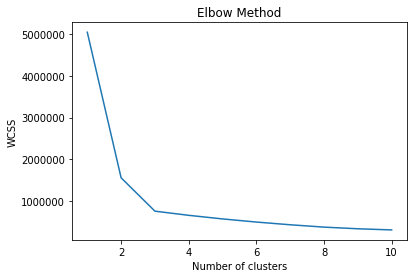

In [ ]:
# Elbow method to determine the number of clusters in data point
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(point)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
K_mean =KMeans(n_clusters=3, max_iter=1000,verbose=1 )
K_mean

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=1)

### We now  run our model with the optimal parameter(number of cluster =3) and fit the model through the data points 

In [ ]:
model = K_mean.fit(point)
model

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 786778.2649056112
start iteration
done sorting
end inner loop
Iteration 1, inertia 762812.6554220583
start iteration
done sorting
end inner loop
Iteration 2, inertia 762578.8405604424
center shift 4.721141e-02 within tolerance 2.521179e-03
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 844764.6779293298
start iteration
done sorting
end inner loop
Iteration 1, inertia 766296.3218542268
start iteration
done sorting
end inner loop
Iteration 2, inertia 762890.609568417
start iteration
done sorting
end inner loop
Iteration 3, inertia 762600.642220989
start iteration
done sorting
end inner loop
Iteration 4, inertia 762575.5971231343
center shift 1.859627e-02 within tolerance 2.521179e-03
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 766490.0687700014
start iteration
done sorting
end inner loop
Iteration 1, inertia 763011

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=1)

### After fitting our model, we now generated the centroids for our three clusters. The centroids have the coordinates given below

In [ ]:
clusters = K_mean.cluster_centers_
clusters

array([[ 2.65932129,  4.95990695],
       [-0.08316134, -5.47042693],
       [ 5.49500821, -9.62886726]])

### We now try to predict to which cluster belong each data point using our KMean model.

In [ ]:
y_km = K_mean.fit_predict(point)
y_km

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 848503.1914302766
start iteration
done sorting
end inner loop
Iteration 1, inertia 768893.8652062556
start iteration
done sorting
end inner loop
Iteration 2, inertia 763275.426169804
start iteration
done sorting
end inner loop
Iteration 3, inertia 762671.412438931
start iteration
done sorting
end inner loop
Iteration 4, inertia 762590.7879690742
center shift 3.680955e-02 within tolerance 2.521179e-03
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 773810.2895602124
start iteration
done sorting
end inner loop
Iteration 1, inertia 763112.3822583471
start iteration
done sorting
end inner loop
Iteration 2, inertia 762640.4422307333
start iteration
done sorting
end inner loop
Iteration 3, inertia 762585.4598106893
center shift 3.094690e-02 within tolerance 2.521179e-03
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 897242

array([1, 1, 2, ..., 2, 2, 0], dtype=int32)

In [ ]:
# We print the predictions
y_km

array([1, 1, 2, ..., 2, 2, 0], dtype=int32)

###  In the following block, we display our data points arranged in clusters  with respect to the prediction done with our model and we print the centoids of the different clusters in the center of each clusters of data.

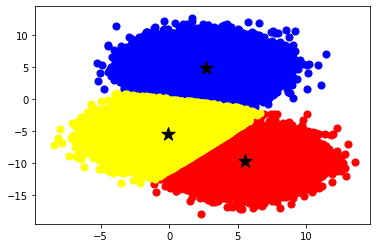

In [ ]:
#plotting all clusters with centroids
plt.scatter(point[y_km== 0,0], point[y_km== 0,1], s=50, color='red')
plt.scatter(point[y_km== 1,0], point[y_km== 1,1], s=50, color='blue')
plt.scatter(point[y_km== 2,0], point[y_km== 2,1], s=50, color='yellow')


plt.scatter(clusters[0][0], clusters[0][1], marker='*', s=200, color='black')
plt.scatter(clusters[1][0], clusters[1][1], marker='*', s=200, color='black')
plt.scatter(clusters[2][0], clusters[2][1], marker='*', s=200, color='black')
#plt.scatter(clusters[3][0], clusters[3][1], marker='*', s=200, color='black')
plt.show()


### In the two following blocks, we try to evaluate how good is our model precition using the silhouette score by computing first the Euclidean distance and then the manhattan distance but we have a poor perfomance for the two metrics and there is no significant difference between the two.

In [ ]:
from sklearn import metrics
labels = K_mean.labels_
silhouette_vals =metrics.silhouette_score(point, y_km, metric = 'euclidean')
silhouette_vals

0.5680374029505039

In [ ]:
from sklearn import metrics
labels = K_mean.labels_
silhouette_vals =metrics.silhouette_score(point, y_km, metric = 'manhattan')
silhouette_vals

0.5687464117421482

### We now use the k-fold cross validation method with 5 folds  to test the accuracy of our prediction, and we  also have poor results  but we can see from the accuracies that one of the folds performed well and the other folds did not perform well and when we take the mean we have a poor result.

In [ ]:
accuracy = cross_val_score(model, point, point1, scoring='accuracy',error_score = 'raise', cv = 5)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1184252.2710715202
start iteration
done sorting
end inner loop
Iteration 1, inertia 1175116.6160820427
start iteration
done sorting
end inner loop
Iteration 2, inertia 1172650.3278240783
start iteration
done sorting
end inner loop
Iteration 3, inertia 1169595.3846735018
start iteration
done sorting
end inner loop
Iteration 4, inertia 1166052.5691643204
start iteration
done sorting
end inner loop
Iteration 5, inertia 1161806.7834586073
start iteration
done sorting
end inner loop
Iteration 6, inertia 1156446.2103817312
start iteration
done sorting
end inner loop
Iteration 7, inertia 1149571.1383507128
start iteration
done sorting
end inner loop
Iteration 8, inertia 1138382.3769416444
start iteration
done sorting
end inner loop
Iteration 9, inertia 1115895.8769445438
start iteration
done sorting
end inner loop
Iteration 10, inertia 1055115.3658316277
start iteration
done sorting
end inner loop
Iterati

In [ ]:
print(accuracy)

[0.32075 0.3617  0.96955 0.362   0.01525]


In [ ]:
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",accuracy.mean() *100)

Accuracy of Model with Cross Validation is: 40.58500000000001


We the decide to do some hyper parameter tunning using the  GridSearchCV to obtain the optimal parameters  combination for our model .

In [ ]:
#Here we import our library
from sklearn.model_selection import GridSearchCV

### We assign the Kmean parameters to the entry grid_values5 and input all the parameters option for the funtion to choose the best combination of parameters.

In [ ]:

grid_values5 = {'n_clusters':[3], 'init':['k-means++'],   'n_init':[1], 'max_iter': [1000],  'tol': [1e-4],  'precompute_distances':['auto'], 'verbose':[0], 'random_state':[1,10,20,30] , 'copy_x':[ 'optional']    }

### We now do the grid search with parameters of the GridSearchCV function the model (Kmeans), all the parameters options of the Kmean model  to evaluate the best accuracy

In [ ]:
grid_model_acc = GridSearchCV(model, param_grid = grid_values5, scoring='accuracy')

### We now look for the optimal number of folds  by iterating over 100 folds and print  the fold having the highest accuracy for the cross validation.

In [ ]:
l=[]
for k in range(2,100):
    accuracy = cross_val_score(grid_model_acc , point, point1, scoring='accuracy',error_score = 'raise', cv = k)
    l.append(accuracy.mean() *100)
    
np.max(l)


96.819

### We now print the list to check the number of fold giving the best accuracy and we see it is  2 -fold and  5-fold 

In [ ]:
l

[96.819,
 56.38659554532186,
 65.456,
 96.81600000000002,
 53.58956657420314,
 79.42234588979903,
 81.068,
 52.19855375299613,
 60.07300000000001,
 40.882558391137756,
 45.89043820932103,
 57.22100572570934,
 83.06527358671534,
 34.96718938430517,
 43.03999999999999,
 66.73344442821931,
 57.35115268186286,
 53.399334312856126,
 62.027,
 72.13284299741437,
 35.49968921221202,
 29.62408027718459,
 39.35603586662659,
 59.245999999999995,
 63.404661478894816,
 35.92631223042529,
 40.949462087746156,
 42.84588519473556,
 37.958243934771396,
 44.91310986457091,
 21.51,
 66.34494726278963,
 71.21596058509941,
 48.76020463024551,
 64.2737414280174,
 43.72423067511426,
 35.04919942569737,
 50.49369577122267,
 40.426,
 78.82043164693943,
 59.78173671820682,
 68.47674171337331,
 78.91926340318037,
 25.12153059660442,
 38.5756695825126,
 31.798122925625748,
 13.841935918960088,
 45.13873653331984,
 52.19199999999999,
 87.67617857953991,
 33.55034981025021,
 61.1733112326891,
 30.838274699234212,
 

In [ ]:
#We now perform the cross validation with 5-fold to confirm our results and we see that it has a good performance
accuracy = cross_val_score(grid_model_acc  , point, point1, scoring='accuracy',error_score = 'raise', cv = 5)

In [ ]:
print(accuracy)

[0.9683  0.96835 0.96955 0.96715 0.96745]


In [ ]:
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",accuracy.mean() *100)

Accuracy of Model with Cross Validation is: 96.81600000000002


### We now perform the cross val prediction to see how well it predicts the different classes with 5-fold to obtain a confusion matrix

In [ ]:

prediction= cross_val_predict(grid_model_acc  , point, point1, cv = 5)


In [ ]:
prediction

array([1, 1, 2, ..., 2, 2, 0], dtype=int32)

### We now import our confusion matrix and input the parameters which are: the actual labels that were removed and we compare it with the labels predicted using the cross validation and we get the following accuracies for the prediction of the different classes

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff1a7d45890>)

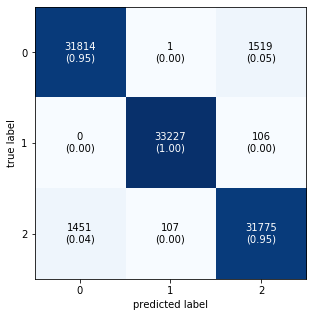

In [ ]:
out = confusion_matrix(point1,prediction)
plot_confusion_matrix(conf_mat=out,figsize=(5,5),show_normed=True)